# Data Analysis

In this part of the report we will do some exploratory data analysis on a subset of the data to get an impression of what kind of data we're dealing with.

In [1]:
library(lubridate)
library(dlookr)
library(dplyr)
library(mice)
library(VIM)
library(Amelia)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: mice


Attaching package: 'mice'


The following object is masked from 'package:stats':

    filter


The following objects are masked from 'package:base':

    cbind, rbind


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'dlookr'


The following object is masked from 'package:base':

    transform



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: 'VIM'


The following object is masked from 'package:datasets':

 

We are going to look at our two 1 percent data sets, which we will see have starkly different results. First we import the data:

In [2]:
temp2 <- tempfile()
start <- proc.time()
download.file("https://github.com/Galeforse/DST-Assessment-02/raw/main/Data/1_percent_data.csv.gz",temp2)
data <- (read.csv(gzfile(temp2)))
print("Data imported in:")
print(seconds_to_period((proc.time()-start)[3]))

[1] "Data imported in:"
[1] "3.79S"


In [3]:
temp2 <- tempfile()
start <- proc.time()
download.file("https://github.com/Galeforse/DST-Assessment-02/raw/main/Data/1_percent_data_head.csv.gz",temp2)
datah <- (read.csv(gzfile(temp2)))
print("Data imported in:")
print(seconds_to_period((proc.time()-start)[3]))

[1] "Data imported in:"
[1] "2.25S"


In [4]:
head(data)

,ts,orig_ip,orig_port,resp_ip,resp_port,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
,<dbl>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>
1,1331915797,192.168.202.102,2633,192.168.23.202,80,tcp,http,0.03,481,8133,RSTO,0,ShADadfR,8,813,9,8505
2,1331923392,192.168.202.110,11574,192.168.23.253,1724,tcp,,NA,NA,NA,REJ,0,Sr,1,48,1,40
3,1331905217,192.168.202.83,41267,192.168.206.44,8010,tcp,,NA,NA,NA,REJ,0,Sr,1,60,1,40
4,1331994375,192.168.202.83,58519,192.168.206.44,5214,tcp,,NA,NA,NA,REJ,0,Sr,1,60,1,40
5,1331999507,192.168.202.140,25774,192.168.23.252,1625,tcp,,NA,NA,NA,S0,0,S,1,48,0,0
6,1331935766,192.168.202.83,60760,192.168.206.44,1580,tcp,,NA,NA,NA,REJ,0,Sr,1,60,1,40


We see that the service column is not properly displaying NA for missing data and so we rectify this in both sets of data with the following command.

In [5]:
data$service[data$service==""] <- NA
datah$service[datah$service==""] <- NA
head(data)

,ts,orig_ip,orig_port,resp_ip,resp_port,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
,<dbl>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>
1,1331915797,192.168.202.102,2633,192.168.23.202,80,tcp,http,0.03,481,8133,RSTO,0,ShADadfR,8,813,9,8505
2,1331923392,192.168.202.110,11574,192.168.23.253,1724,tcp,NA,NA,NA,NA,REJ,0,Sr,1,48,1,40
3,1331905217,192.168.202.83,41267,192.168.206.44,8010,tcp,NA,NA,NA,NA,REJ,0,Sr,1,60,1,40
4,1331994375,192.168.202.83,58519,192.168.206.44,5214,tcp,NA,NA,NA,NA,REJ,0,Sr,1,60,1,40
5,1331999507,192.168.202.140,25774,192.168.23.252,1625,tcp,NA,NA,NA,NA,S0,0,S,1,48,0,0
6,1331935766,192.168.202.83,60760,192.168.206.44,1580,tcp,NA,NA,NA,NA,REJ,0,Sr,1,60,1,40


We are going to use the diagnose function to take a look at how much of the data is missing in each case along with a couple of additional commands.

In [6]:
diagnose(data)
print("No. of entries in data:")
nrow(data)
class(data)

variables,types,missing_count,missing_percent,unique_count,unique_rate
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
ts,numeric,0,0.00000,167908,7.398686e-01
orig_ip,character,0,0.00000,179,7.887443e-04
orig_port,integer,0,0.00000,50876,2.241796e-01
resp_ip,character,0,0.00000,2764,1.217927e-02
resp_port,integer,0,0.00000,54572,2.404657e-01
proto,character,0,0.00000,3,1.321918e-05
service,character,220157,97.00982,9,3.965754e-05
duration,numeric,187905,82.79832,1024,4.512146e-03
orig_bytes,numeric,187905,82.79832,1011,4.454863e-03


[1] "No. of entries in data:"


[1] 226943

[1] "data.frame"

In [7]:
diagnose(datah)
print("No. of entries in data:")
nrow(datah)
class(datah)

variables,types,missing_count,missing_percent,unique_count,unique_rate
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
ts,numeric,0,0.00000,8231,3.626902e-02
orig_ip,character,0,0.00000,72,3.172603e-04
orig_port,integer,0,0.00000,5289,2.330541e-02
resp_ip,character,0,0.00000,517,2.278105e-03
resp_port,integer,0,0.00000,28117,1.238945e-01
proto,character,0,0.00000,3,1.321918e-05
service,character,225579,99.39897,6,2.643836e-05
duration,numeric,82146,36.19675,1040,4.582649e-03
orig_bytes,integer,82146,36.19675,202,8.900913e-04


[1] "No. of entries in data:"


[1] 226943

[1] "data.frame"

As expected of 1 percent data, it's good to see that each set of data is of each size (from the `nrow` command). Upon inspecting the missing data we see that the missingness of data varies greatly.

In our "head" data we see that about 36% of the entries in variables `duration`, `orig_bytes`, and `resp_bytes` are missing, which is a significant amount of missing data. However, the randomly sampled data has an even higher missing rate of 82% which is an extremely large amount of data missing.

Additionally we notice that these 3 columns must be related to each other as they all share exactly the same amount of missing data.

If we are to now address the service column we see that almost all of the data is missing from either of our samples. For this reason as there is barely any useful information to build upon, through the rest of this report you will notice that the service column is often dropped from use due it it's lack of significance.

In [8]:
nrow(data[!complete.cases(data),])
cut_data <- na.omit(data)
nrow(cut_data)

[1] 221771

[1] 5172

In [9]:
nrow(datah[!complete.cases(datah),])
cut_datah <- na.omit(datah)
nrow(cut_datah)

[1] 226181

[1] 762

In either dataset it seems that it would not be a good idea just to cut data from our analysis as it would leave us with a miniscule fraction of our original data. This was the primary analysis that led us to decide to try and make a model that could predict missing data, as to move onto any other meaninful analysis we would either have to perform a very basic imputation for missing data (which we will discuss later in the report) or more easily cut the missing data. While this would still create a dataset that we could perform analysis on, it seemed that with this much missing data it would be interesting to have a go at trying to create a model to fill this in.

In [10]:
summary(data)

       ts              orig_ip            orig_port       resp_ip         
 Min.   :1.332e+09   Length:226943      Min.   :    3   Length:226943     
 1st Qu.:1.332e+09   Class :character   1st Qu.:35857   Class :character  
 Median :1.332e+09   Mode  :character   Median :44316   Mode  :character  
 Mean   :1.332e+09                      Mean   :42635                     
 3rd Qu.:1.332e+09                      3rd Qu.:54373                     
 Max.   :1.332e+09                      Max.   :65535                     
                                                                          
   resp_port        proto             service             duration      
 Min.   :    0   Length:226943      Length:226943      Min.   :   0.01  
 1st Qu.: 2111   Class :character   Class :character   1st Qu.:   0.01  
 Median :10115   Mode  :character   Mode  :character   Median :   0.02  
 Mean   :20391                                         Mean   :   1.47  
 3rd Qu.:37749                     

In [11]:
summary(datah)

       ts              orig_ip            orig_port       resp_ip         
 Min.   :1.332e+09   Length:226943      Min.   :    3   Length:226943     
 1st Qu.:1.332e+09   Class :character   1st Qu.:63805   Class :character  
 Median :1.332e+09   Mode  :character   Median :63805   Mode  :character  
 Mean   :1.332e+09                      Mean   :63109                     
 3rd Qu.:1.332e+09                      3rd Qu.:63805                     
 Max.   :1.332e+09                      Max.   :65456                     
                                                                          
   resp_port        proto             service             duration     
 Min.   :    0   Length:226943      Length:226943      Min.   :  0.01  
 1st Qu.:18191   Class :character   Class :character   1st Qu.:  0.01  
 Median :33550   Mode  :character   Mode  :character   Median :  0.03  
 Mean   :33224                                         Mean   :  0.37  
 3rd Qu.:48911                          

Below we're going to take a quick look at the relationship of missing data using the `md.pattern` command.

'data.frame':	226943 obs. of  17 variables:
 $ ts           : num  1.33e+09 1.33e+09 1.33e+09 1.33e+09 1.33e+09 ...
 $ orig_ip      : chr  "192.168.202.102" "192.168.202.110" "192.168.202.83" "192.168.202.83" ...
 $ orig_port    : int  2633 11574 41267 58519 25774 60760 57224 60918 58071 46497 ...
 $ resp_ip      : chr  "192.168.23.202" "192.168.23.253" "192.168.206.44" "192.168.206.44" ...
 $ resp_port    : int  80 1724 8010 5214 1625 1580 36350 37723 4899 64100 ...
 $ proto        : chr  "tcp" "tcp" "tcp" "tcp" ...
 $ service      : chr  "http" NA NA NA ...
 $ duration     : num  0.03 NA NA NA NA NA NA NA NA NA ...
 $ orig_bytes   : num  481 NA NA NA NA NA NA NA NA NA ...
 $ resp_bytes   : int  8133 NA NA NA NA NA NA NA NA NA ...
 $ conn_state   : chr  "RSTO" "REJ" "REJ" "REJ" ...
 $ missed_bytes : int  0 0 0 0 0 0 0 0 0 0 ...
 $ history      : chr  "ShADadfR" "Sr" "Sr" "Sr" ...
 $ orig_pkts    : int  8 1 1 1 1 1 1 1 1 1 ...
 $ orig_ip_bytes: int  813 48 60 60 48 60 48 60 60 48 ...
 

,ts,orig_ip,orig_port,resp_ip,resp_port,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes,service,
5172,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
33866,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
1614,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,3
186291,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,4
,0,0,0,0,0,0,0,0,0,0,0,0,0,187905,187905,187905,220157,783872


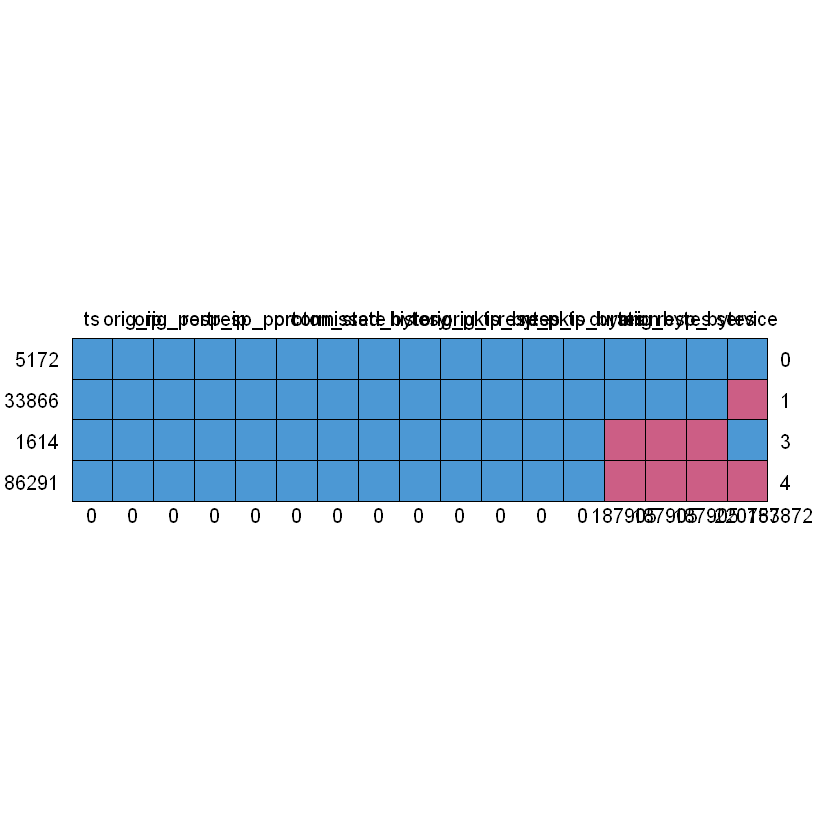

In [12]:
str(data)
md.pattern(data)

'data.frame':	226943 obs. of  17 variables:
 $ ts           : num  1.33e+09 1.33e+09 1.33e+09 1.33e+09 1.33e+09 ...
 $ orig_ip      : chr  "192.168.202.79" "192.168.202.79" "192.168.202.79" "192.168.202.79" ...
 $ orig_port    : int  50463 46117 50465 50467 46119 46121 46123 50469 50471 50473 ...
 $ resp_ip      : chr  "192.168.229.251" "192.168.229.254" "192.168.229.251" "192.168.229.251" ...
 $ resp_port    : int  80 443 80 80 443 443 443 80 80 80 ...
 $ proto        : chr  "tcp" "tcp" "tcp" "tcp" ...
 $ service      : chr  NA NA "http" "http" ...
 $ duration     : num  NA NA 0.01 0.01 0.02 0.01 0.01 0.02 0.01 0.01 ...
 $ orig_bytes   : int  NA NA 166 166 544 544 548 166 166 164 ...
 $ resp_bytes   : int  NA NA 214 214 1060 1060 1060 214 214 214 ...
 $ conn_state   : chr  "SH" "SF" "SF" "SF" ...
 $ missed_bytes : int  0 0 0 0 0 0 0 0 0 0 ...
 $ history      : chr  "Fa" "dDafFr" "ShADfFa" "ShADfFa" ...
 $ orig_pkts    : int  1 3 4 4 8 8 8 4 4 4 ...
 $ orig_ip_bytes: int  52 382 382 38

,ts,orig_ip,orig_port,resp_ip,resp_port,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes,service,
762,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
144035,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
602,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,3
81544,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,4
,0,0,0,0,0,0,0,0,0,0,0,0,0,82146,82146,82146,225579,472017


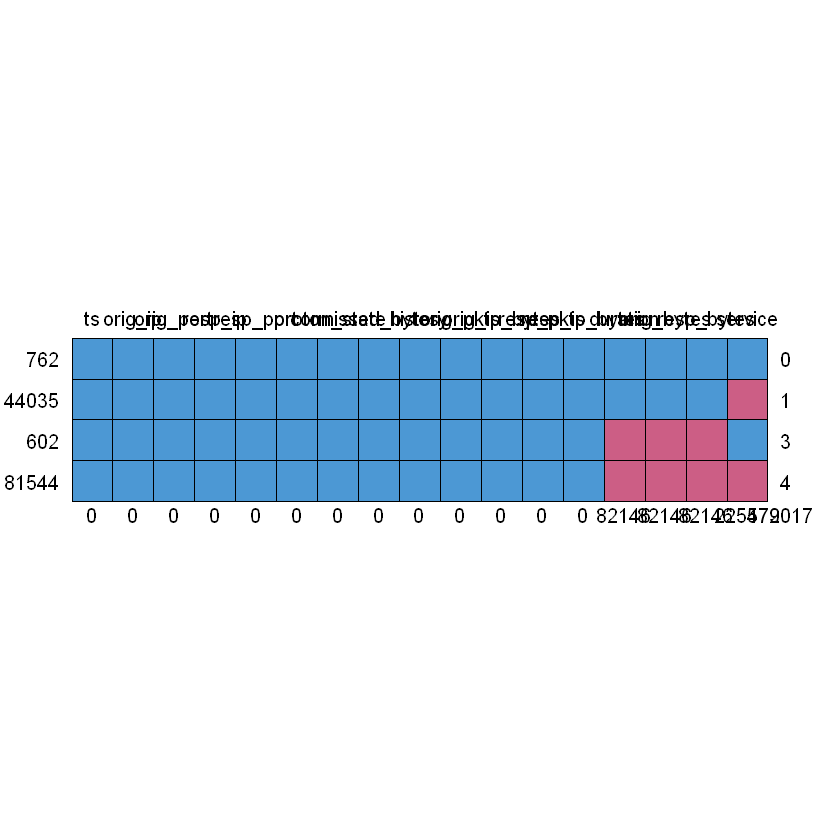

In [13]:
str(datah)
md.pattern(datah)

The plot actually shows pretty much the same information as the table above it, but just in a more visually appealing way. What we notice from this table is that in both cases it seems that service missing service is not dependent on the other columns. In fact the exact numbers for each data set are:
### data
* 5172 complete rows.
* 33866 rows missing `service`, but not missing `duration`, `orig_bytes`, or `resp_bytes`.
* 1614 rows missing just `duration`, `orig_bytes`, or `resp_bytes` but not `service`.
* 186291 missing all four.

### datah
* 762 complete rows.
* 144035 rows missing `service`, but not missing `duration`, `orig_bytes`, or `resp_bytes`.
* 602 rows missing just `duration`, `orig_bytes`, or `resp_bytes` but not `service`.
* 81544 missing all four.

We can also show missing data distribution in a graphical way with the following commands.


 Variables sorted by number of missings: 
   Variable     Count
    service 0.9700982
   duration 0.8279832
 orig_bytes 0.8279832
 resp_bytes 0.8279832


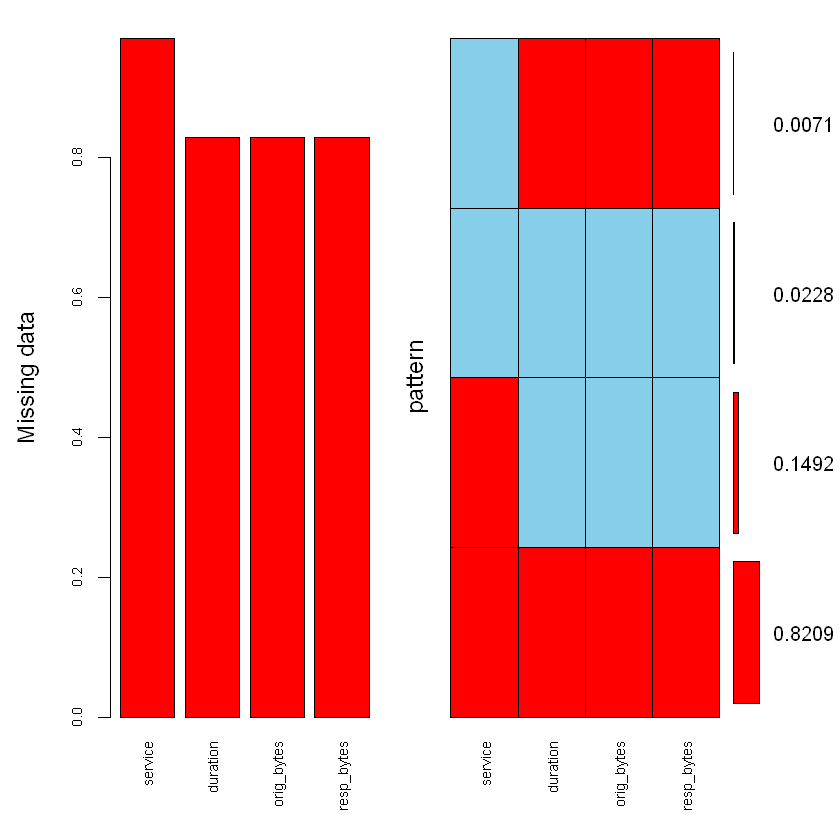

In [14]:
data_mis <- subset(data, select = c(service,duration,orig_bytes,resp_bytes))
mice_plot <- aggr(data_mis,numbers=TRUE, sortVars=TRUE,labels=c("service","duration","orig_bytes","resp_bytes"),cex.axis=.7,gap=3, ylab=c("Missing data","pattern"))


 Variables sorted by number of missings: 
   Variable     Count
    service 0.9939897
   duration 0.3619675
 orig_bytes 0.3619675
 resp_bytes 0.3619675


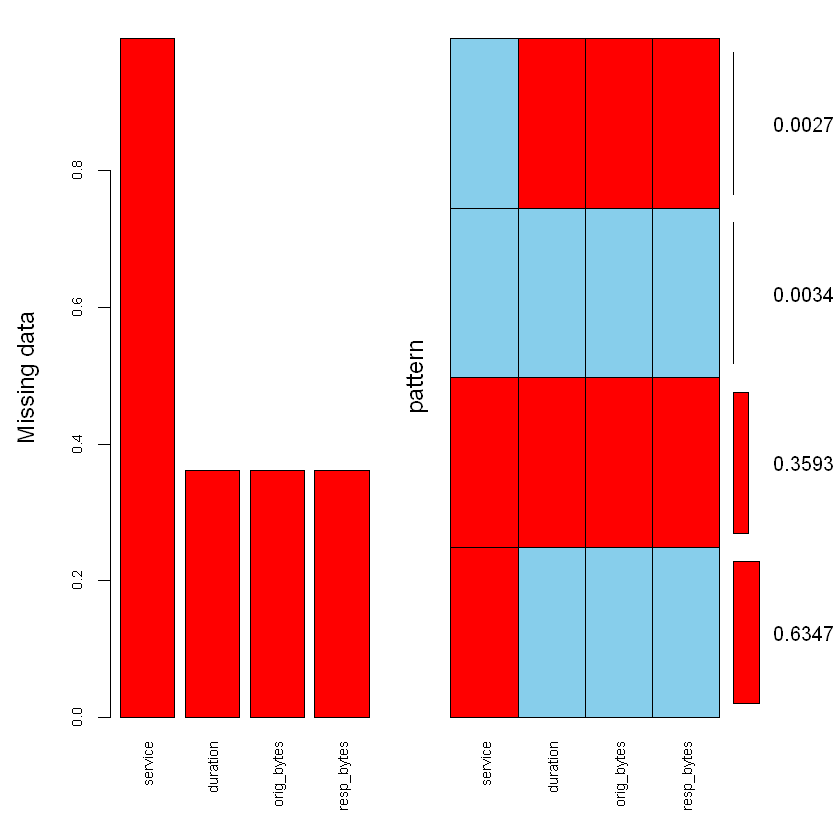

In [15]:
data_mis <- subset(datah, select = c(service,duration,orig_bytes,resp_bytes))
mice_plot <- aggr(data_mis,numbers=TRUE, sortVars=TRUE,labels=c("service","duration","orig_bytes","resp_bytes"),cex.axis=.7,gap=3, ylab=c("Missing data","pattern"))

And in another method we create the following missingness maps.

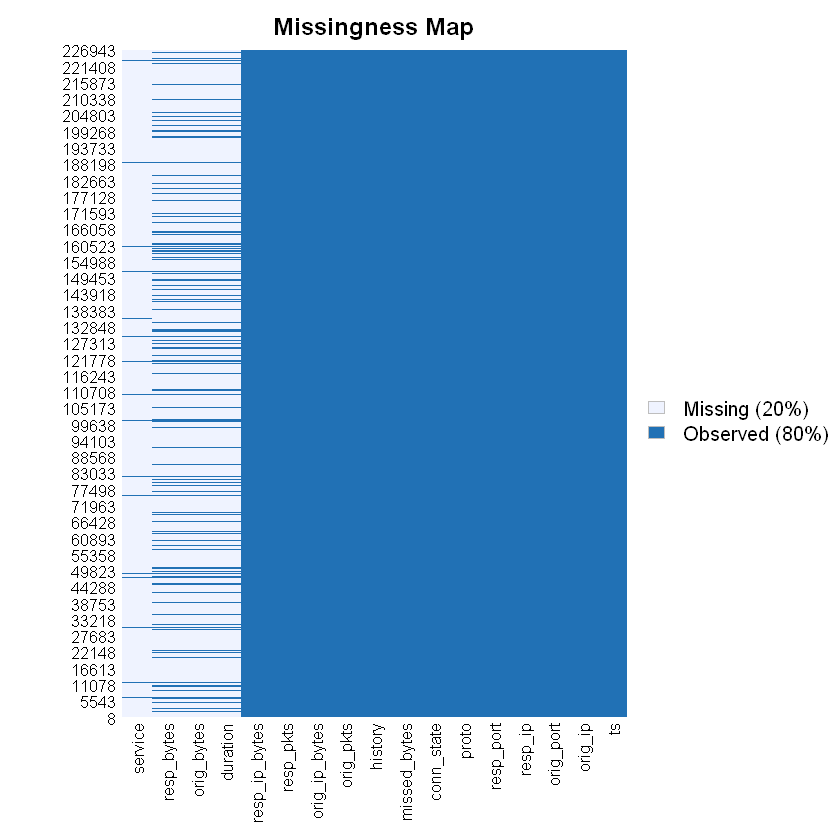

In [16]:
missmap(data)

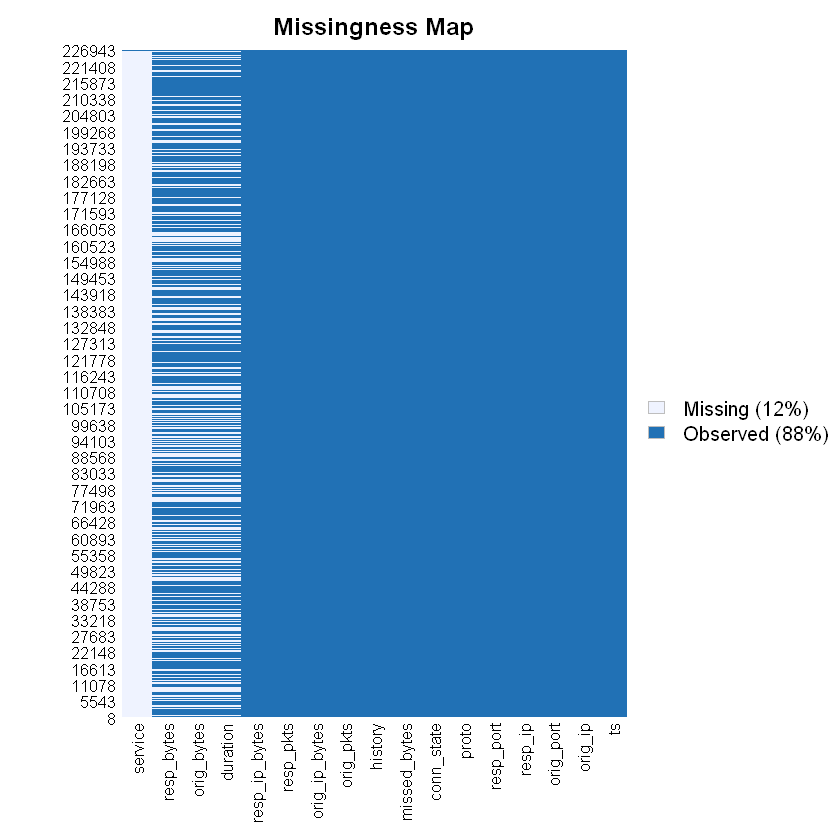

In [17]:
missmap(datah)

As previously mentioned, missing data is an interesting concept to try and predict. And we have attempted (some successfully, and some unsuccessfully) to imput the missing data of `duration`, `orig_bytes`, and `resp_bytes` in the rest of this report. Generally leaving service as it is both discrete and missing such a large portion of it's values.